# Decision Trees for Regression Part 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

# yahoo finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AMD'
start = '2014-01-01'
end = '2018-08-27'

# Read data 
dataset = yf.download(symbol,start,end)

# View Columns
dataset.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,3.85,3.98,3.84,3.95,3.95,20548400
2014-01-03,3.98,4.00,3.88,4.00,4.00,22887200
2014-01-06,4.01,4.18,3.99,4.13,4.13,42398300
2014-01-07,4.19,4.25,4.11,4.18,4.18,42932100
2014-01-08,4.23,4.26,4.14,4.18,4.18,30678700


In [3]:
# Create more data
dataset['Increase_Decrease'] = np.where(dataset['Volume'].shift(-1) > dataset['Volume'],1,0)
dataset['Buy_Sell_on_Open'] = np.where(dataset['Open'].shift(-1) > dataset['Open'],1,-1)
dataset['Buy_Sell'] = np.where(dataset['Adj Close'].shift(-1) > dataset['Adj Close'],1,-1)
dataset['Return'] = dataset['Adj Close'].pct_change()
dataset = dataset.dropna()
dataset.head()

,Open,High,Low,Close,Adj Close,Volume,Increase_Decrease,Buy_Sell_on_Open,Buy_Sell,Return
Date,,,,,,,,,,
2014-01-03,3.98,4.00,3.88,4.00,4.00,22887200,1,1,1,0.012658
2014-01-06,4.01,4.18,3.99,4.13,4.13,42398300,1,1,1,0.032500
2014-01-07,4.19,4.25,4.11,4.18,4.18,42932100,0,1,-1,0.012106
2014-01-08,4.23,4.26,4.14,4.18,4.18,30678700,0,-1,-1,0.000000
2014-01-09,4.20,4.23,4.05,4.09,4.09,30667600,0,-1,1,-0.021531


In [4]:
dataset.shape

(1170, 10)

In [5]:
X = dataset.drop(['Adj Close', 'Close'], axis=1)  
y = dataset['Adj Close'] 

In [9]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [10]:
from sklearn.tree import DecisionTreeRegressor  
regressor = DecisionTreeRegressor()  
regressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [11]:
y_pred = regressor.predict(X_test)

In [12]:
print("Original Labels",y_test)
print("Labels Predicted",y_pred)

Original Labels Date
2017-08-04    13.120000
2017-06-22    14.380000
2016-05-17     3.790000
2015-04-24     2.300000
2015-09-11     2.010000
                ...    
2017-04-20    13.110000
2014-03-11     3.850000
2018-07-09    16.610001
2018-02-21    11.720000
2018-08-20    19.980000
Name: Adj Close, Length: 234, dtype: float64
Labels Predicted [12.97000027 14.31999969  3.83999991  2.32999992  2.0999999   2.33999991
 12.13000011  2.73000002  2.51999998 13.81000042 16.55999947  6.5
  2.8599999   7.46999979  2.3900001  16.36000061 13.22000027  3.78999996
 11.90999985  4.5999999   3.54999995  2.78999996  4.13999987 20.39999962
 12.75        2.3599999   3.03999996 12.31000042 11.43999958  5.11999989
 13.57999992 12.47999954 13.34000015  1.83000004 13.18999958 13.31000042
  4.01999998  2.1400001   2.18000007 10.55000019  1.98000002  2.36999989
  5.94000006  7.11000013  5.40999985  2.71000004 10.89000034  1.82000005
 16.5        10.82999992  8.52999973 11.90999985 11.19999981 14.55000019
 11

[Text(219.19855234355387, 211.4, 'X[1] <= 8.355\nmse = 23.42\nsamples = 936\nvalue = 6.938'),
 Text(145.17096350897566, 199.32, 'X[1] <= 4.925\nmse = 2.132\nsamples = 587\nvalue = 3.497'),
 Text(98.63887655347729, 187.24, 'X[1] <= 3.3\nmse = 0.725\nsamples = 503\nvalue = 3.01'),
 Text(56.09310585613859, 175.16, 'X[1] <= 2.465\nmse = 0.154\nsamples = 306\nvalue = 2.39'),
 Text(26.28364925935225, 163.07999999999998, 'X[1] <= 2.095\nmse = 0.046\nsamples = 153\nvalue = 2.052'),
 Text(13.711837810695457, 151.0, 'X[2] <= 1.835\nmse = 0.012\nsamples = 75\nvalue = 1.861'),
 Text(6.745593773537535, 138.92000000000002, 'X[2] <= 1.73\nmse = 0.004\nsamples = 40\nvalue = 1.777'),
 Text(1.9753452171729853, 126.84, 'X[1] <= 1.71\nmse = 0.002\nsamples = 16\nvalue = 1.713'),
 Text(0.6724579462716546, 114.75999999999999, 'X[2] <= 1.63\nmse = 0.0\nsamples = 3\nvalue = 1.65'),
 Text(0.3362289731358273, 102.67999999999999, 'mse = 0.0\nsamples = 1\nvalue = 1.62'),
 Text(1.008686919407482, 102.67999999999999

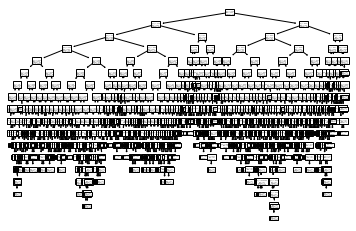

In [14]:
from sklearn import tree

tree.plot_tree(regressor) 